In [1]:
import pandas as pd
from pandas import read_csv
from numpy import set_printoptions
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
from sklearn import datasets 
from pylab import * 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
import seaborn as sns;sns.set()
import matplotlib.pyplot as plt 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
train=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\train.csv');
test=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\test.csv');
train.describe()

,BranchCode,Number of Bags,Quantity,Quantity Per,Quantity in KG,Rate per UOM,Total Amount,Exchange Rate,Total Amount (LCY),Division,CGST,SGST,IGST,GST %,GL Account No,ILE Cost Amount Actual,Forward Rate
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,3.050000e+02,305.000000,305.0,305.0,305.0,305.0,305.0,3.050000e+02,305.000000
mean,115.924590,669.593443,9166.104732,28.438607,3704.640662,670.185786,20261.264230,70.129344,1.516322e+06,2002.006557,0.0,0.0,0.0,0.0,50102.0,-1.289168e+06,69.975236
std,49.409915,760.016226,10157.231534,113.022114,6805.632465,2167.206045,33068.500549,15.290556,2.465484e+06,0.606941,0.0,0.0,0.0,0.0,0.0,2.045995e+06,14.823022
min,101.000000,7.000000,0.567000,0.078000,25.200000,0.340000,171.360000,53.550000,1.029017e+04,2001.000000,0.0,0.0,0.0,0.0,50102.0,-1.359798e+07,53.769100
25%,101.000000,147.000000,1764.000000,1.125000,345.600000,0.670000,3816.000000,60.050000,2.362896e+05,2002.000000,0.0,0.0,0.0,0.0,50102.0,-1.483557e+06,59.975800
50%,101.000000,392.000000,6048.000000,2.400000,926.100000,1.100000,9216.000000,60.050000,5.366938e+05,2002.000000,0.0,0.0,0.0,0.0,50102.0,-4.370202e+05,59.975800
75%,101.000000,900.000000,14400.000000,5.448000,2527.200000,3.010000,21997.680000,86.700000,1.661184e+06,2002.000000,0.0,0.0,0.0,0.0,50102.0,-1.908202e+05,84.850000
max,401.000000,5292.000000,48000.000000,625.000000,27500.000000,14665.700000,302480.060000,107.500000,1.816393e+07,2004.000000,0.0,0.0,0.0,0.0,50102.0,-8.967860e+03,111.380500


In [2]:
test.describe()

,BranchCode,Number of Bags,Quantity,Quantity Per,Quantity in KG,Rate per UOM,Total Amount,Exchange Rate,Total Amount (LCY),Division,CGST,SGST,IGST,GST %,GL Account No,ILE Cost Amount Actual,Forward Rate
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,3.050000e+02,305.000000,305.0,305.0,305.0,305.0,305.0,3.050000e+02,305.000000
mean,115.924590,669.593443,9166.104732,28.438607,3704.640662,670.185786,20261.264230,70.129344,1.516322e+06,2002.006557,0.0,0.0,0.0,0.0,50102.0,-1.289168e+06,69.975236
std,49.409915,760.016226,10157.231534,113.022114,6805.632465,2167.206045,33068.500549,15.290556,2.465484e+06,0.606941,0.0,0.0,0.0,0.0,0.0,2.045995e+06,14.823022
min,101.000000,7.000000,0.567000,0.078000,25.200000,0.340000,171.360000,53.550000,1.029017e+04,2001.000000,0.0,0.0,0.0,0.0,50102.0,-1.359798e+07,53.769100
25%,101.000000,147.000000,1764.000000,1.125000,345.600000,0.670000,3816.000000,60.050000,2.362896e+05,2002.000000,0.0,0.0,0.0,0.0,50102.0,-1.483557e+06,59.975800
50%,101.000000,392.000000,6048.000000,2.400000,926.100000,1.100000,9216.000000,60.050000,5.366938e+05,2002.000000,0.0,0.0,0.0,0.0,50102.0,-4.370202e+05,59.975800
75%,101.000000,900.000000,14400.000000,5.448000,2527.200000,3.010000,21997.680000,86.700000,1.661184e+06,2002.000000,0.0,0.0,0.0,0.0,50102.0,-1.908202e+05,84.850000
max,401.000000,5292.000000,48000.000000,625.000000,27500.000000,14665.700000,302480.060000,107.500000,1.816393e+07,2004.000000,0.0,0.0,0.0,0.0,50102.0,-8.967860e+03,111.380500


In [3]:
train.isna()

,BranchCode,Number of Bags,Quantity,Quantity Per,Quantity in KG,Rate per UOM,Total Amount,Exchange Rate,Total Amount (LCY),Division,CGST,SGST,IGST,GST %,GL Account No,ILE Cost Amount Actual,Forward Rate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
302,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
303,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
test.isna()

,BranchCode,Number of Bags,Quantity,Quantity Per,Quantity in KG,Rate per UOM,Total Amount,Exchange Rate,Total Amount (LCY),Division,CGST,SGST,IGST,GST %,GL Account No,ILE Cost Amount Actual,Forward Rate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
302,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
303,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BranchCode              305 non-null    int64  
 1   Number of Bags          305 non-null    int64  
 2   Quantity                305 non-null    float64
 3   Quantity Per            305 non-null    float64
 4   Quantity in KG          305 non-null    float64
 5   Rate per UOM            305 non-null    float64
 6   Total Amount            305 non-null    float64
 7   Exchange Rate           305 non-null    float64
 8   Total Amount (LCY)      305 non-null    float64
 9   Division                305 non-null    int64  
 10  CGST                    305 non-null    int64  
 11  SGST                    305 non-null    int64  
 12  IGST                    305 non-null    int64  
 13  GST %                   305 non-null    int64  
 14  GL Account No           305 non-null    in

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BranchCode              305 non-null    int64  
 1   Number of Bags          305 non-null    int64  
 2   Quantity                305 non-null    float64
 3   Quantity Per            305 non-null    float64
 4   Quantity in KG          305 non-null    float64
 5   Rate per UOM            305 non-null    float64
 6   Total Amount            305 non-null    float64
 7   Exchange Rate           305 non-null    float64
 8   Total Amount (LCY)      305 non-null    float64
 9   Division                305 non-null    int64  
 10  CGST                    305 non-null    int64  
 11  SGST                    305 non-null    int64  
 12  IGST                    305 non-null    int64  
 13  GST %                   305 non-null    int64  
 14  GL Account No           305 non-null    in

In [7]:
train.shape

(305, 17)

In [8]:
test.shape

(305, 17)

In [9]:
irisData =load_iris()
gnb=GaussianNB()
# Create feature and target arrays 
X = irisData.data
y = irisData.target
columns=['Attribute']
X_train, X_test, y_train, y_test = train_test_split( 
 X, y, test_size = 0.2, random_state=5)
model=gnb.fit(X_train,y_train)
numeric_features=train.select_dtypes(include=[np.number])
numeric_features.dtypes
corr=numeric_features.corr()
corr



,BranchCode,Number of Bags,Quantity,Quantity Per,Quantity in KG,Rate per UOM,Total Amount,Exchange Rate,Total Amount (LCY),Division,CGST,SGST,IGST,GST %,GL Account No,ILE Cost Amount Actual,Forward Rate
BranchCode,1.000000,-0.054474,-0.027438,0.389204,0.531817,0.400439,0.406026,0.262497,0.437992,0.124624,NaN,NaN,NaN,NaN,NaN,-0.434597,0.291199
Number of Bags,-0.054474,1.000000,0.560201,-0.179143,0.188302,-0.153033,0.182668,0.300736,0.188542,0.099157,NaN,NaN,NaN,NaN,NaN,-0.240309,0.287459
Quantity,-0.027438,0.560201,1.000000,-0.008544,0.134504,-0.279059,0.092747,0.177910,0.112740,0.387534,NaN,NaN,NaN,NaN,NaN,-0.081927,0.173579
Quantity Per,0.389204,-0.179143,-0.008544,1.000000,0.481178,0.450524,0.582367,0.158010,0.589369,0.175302,NaN,NaN,NaN,NaN,NaN,-0.563121,0.232220
Quantity in KG,0.531817,0.188302,0.134504,0.481178,1.000000,0.381388,0.701307,0.376948,0.755353,0.222758,NaN,NaN,NaN,NaN,NaN,-0.737238,0.392585
Rate per UOM,0.400439,-0.153033,-0.279059,0.450524,0.381388,1.000000,0.638941,0.191620,0.621417,-0.513173,NaN,NaN,NaN,NaN,NaN,-0.572085,0.262914
Total Amount,0.406026,0.182668,0.092747,0.582367,0.701307,0.638941,1.000000,0.189319,0.975794,-0.155132,NaN,NaN,NaN,NaN,NaN,-0.932957,0.246194
Exchange Rate,0.262497,0.300736,0.177910,0.158010,0.376948,0.191620,0.189319,1.000000,0.307560,0.061423,NaN,NaN,NaN,NaN,NaN,-0.319319,0.986382
Total Amount (LCY),0.437992,0.188542,0.112740,0.589369,0.755353,0.621417,0.975794,0.307560,1.000000,-0.128894,NaN,NaN,NaN,NaN,NaN,-0.969440,0.349996
Division,0.124624,0.099157,0.387534,0.175302,0.222758,-0.513173,-0.155132,0.061423,-0.128894,1.000000,NaN,NaN,NaN,NaN,NaN,0.155909,0.061068


<function title at 0x000001A744126160>
<function xlabel at 0x000001A7441262A0>
<function ylabel at 0x000001A744126340>


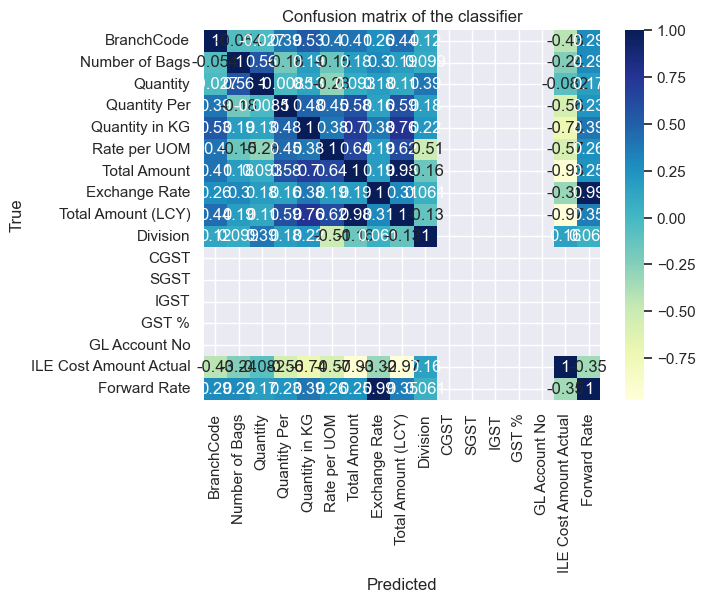

In [10]:
sns.heatmap(train.corr(), cmap="YlGnBu", annot = True)
plt.title('Confusion matrix of the classifier')
print(plt.title)
plt.xlabel('Predicted')
plt.ylabel('True')
print(plt.xlabel)
print(plt.ylabel)
plt.show()

       BranchCode  Number of Bags      Quantity  Quantity Per  Quantity in KG  \
count  305.000000      305.000000    305.000000    305.000000      305.000000   
mean   115.924590      669.593443   9166.104732     28.438607     3704.640662   
std     49.409915      760.016226  10157.231534    113.022114     6805.632465   
min    101.000000        7.000000      0.567000      0.078000       25.200000   
25%    101.000000      147.000000   1764.000000      1.125000      345.600000   
50%    101.000000      392.000000   6048.000000      2.400000      926.100000   
75%    101.000000      900.000000  14400.000000      5.448000     2527.200000   
max    401.000000     5292.000000  48000.000000    625.000000    27500.000000   

       Rate per UOM   Total Amount  Exchange Rate  Total Amount (LCY)  \
count    305.000000     305.000000     305.000000        3.050000e+02   
mean     670.185786   20261.264230      70.129344        1.516322e+06   
std     2167.206045   33068.500549      15.290556  

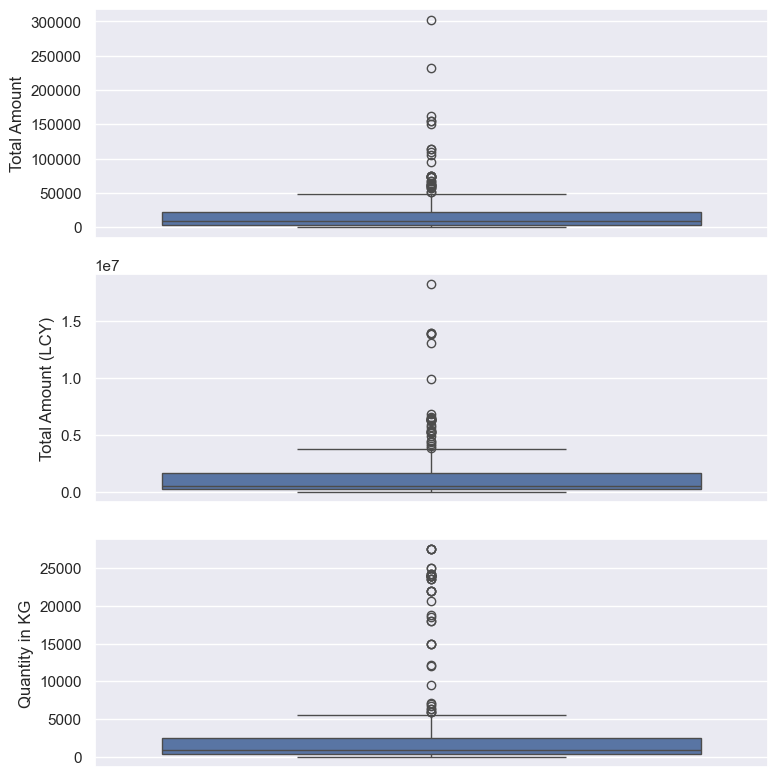

In [11]:

print(train.describe()) 
print(train.isnull().sum()*100/train.shape[0]) 
fig, axs = plt.subplots(3, figsize = (8,8)) 
plt.style.use('fivethirtyeight')
plt1 = sns.boxplot(train['Total Amount'], ax = axs[0]) 
plt2 = sns.boxplot(train['Total Amount (LCY)'], ax = axs[1]) 
plt3 = sns.boxplot(train['Quantity in KG'], ax = axs[2])  
plt.tight_layout() 

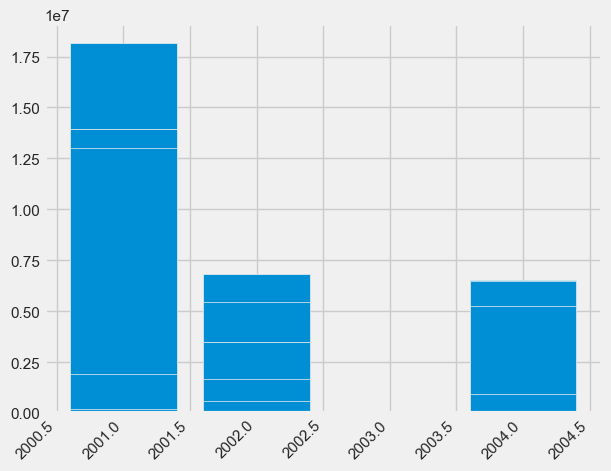

In [12]:
plt.bar(train['Division'],train['Total Amount (LCY)'])
plt.xticks(rotation=45,ha='right')
plt.show() 

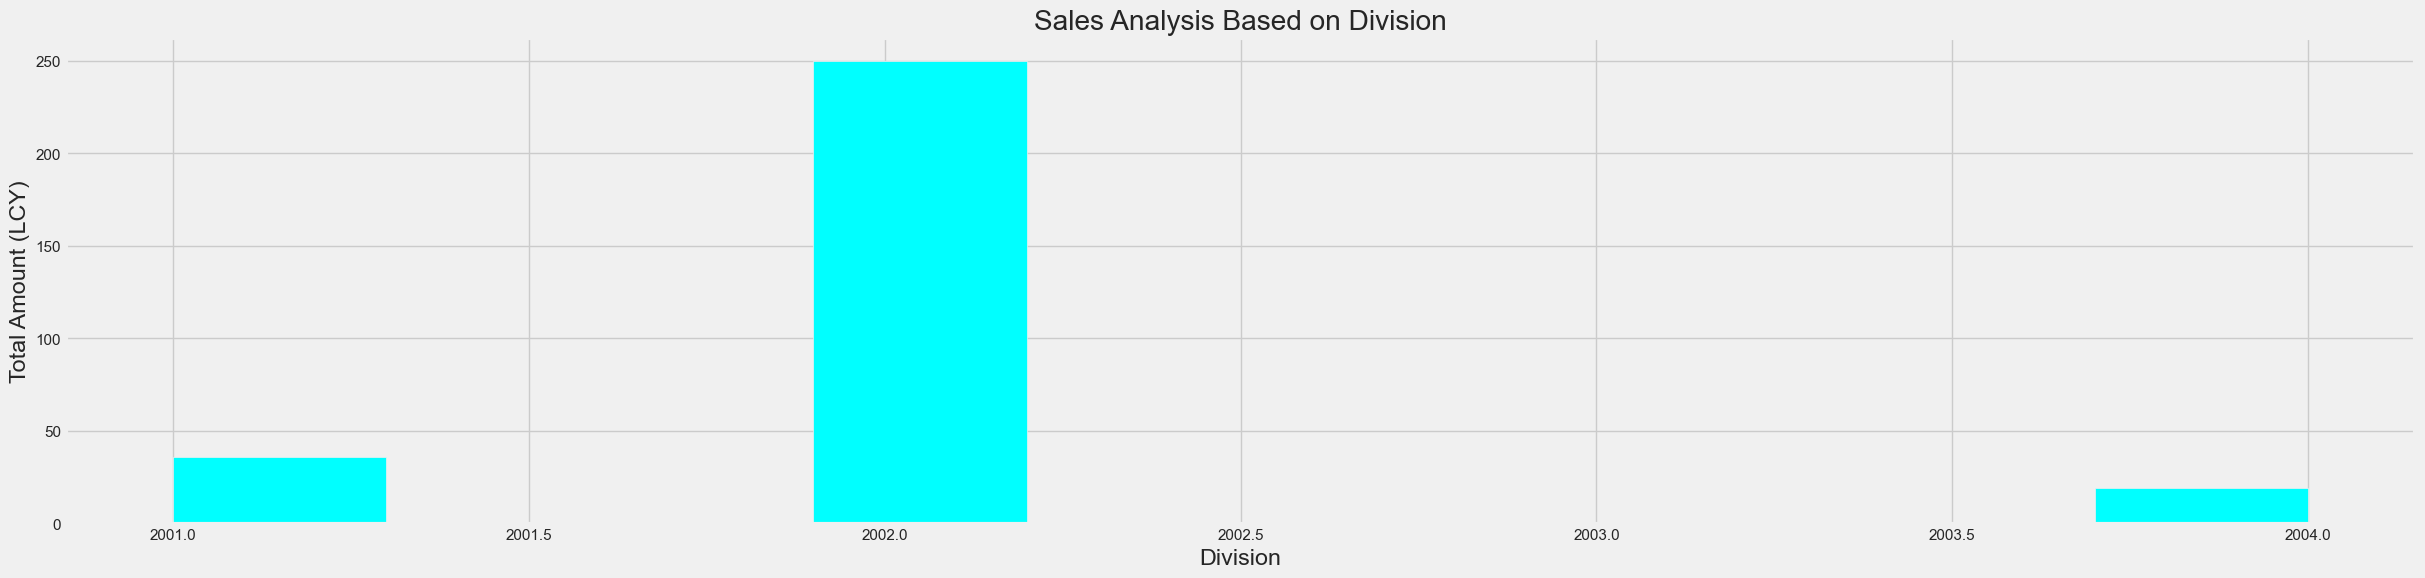

In [13]:
numeric_features=train.select_dtypes(include=[np.number]) 
numeric_features.dtypes 
plt.style.use('fivethirtyeight') 
101 
train.Division.plot(kind='hist',color='cyan',figsize=(27,6)) 
x=np.linspace(0.1,2*np.pi,41) 
y=np.exp(np.sin(x)) 
plt.xlabel("Division") 
plt.ylabel("Total Amount (LCY)") 
plt.title("Sales Analysis Based on Division") 
plt.show()

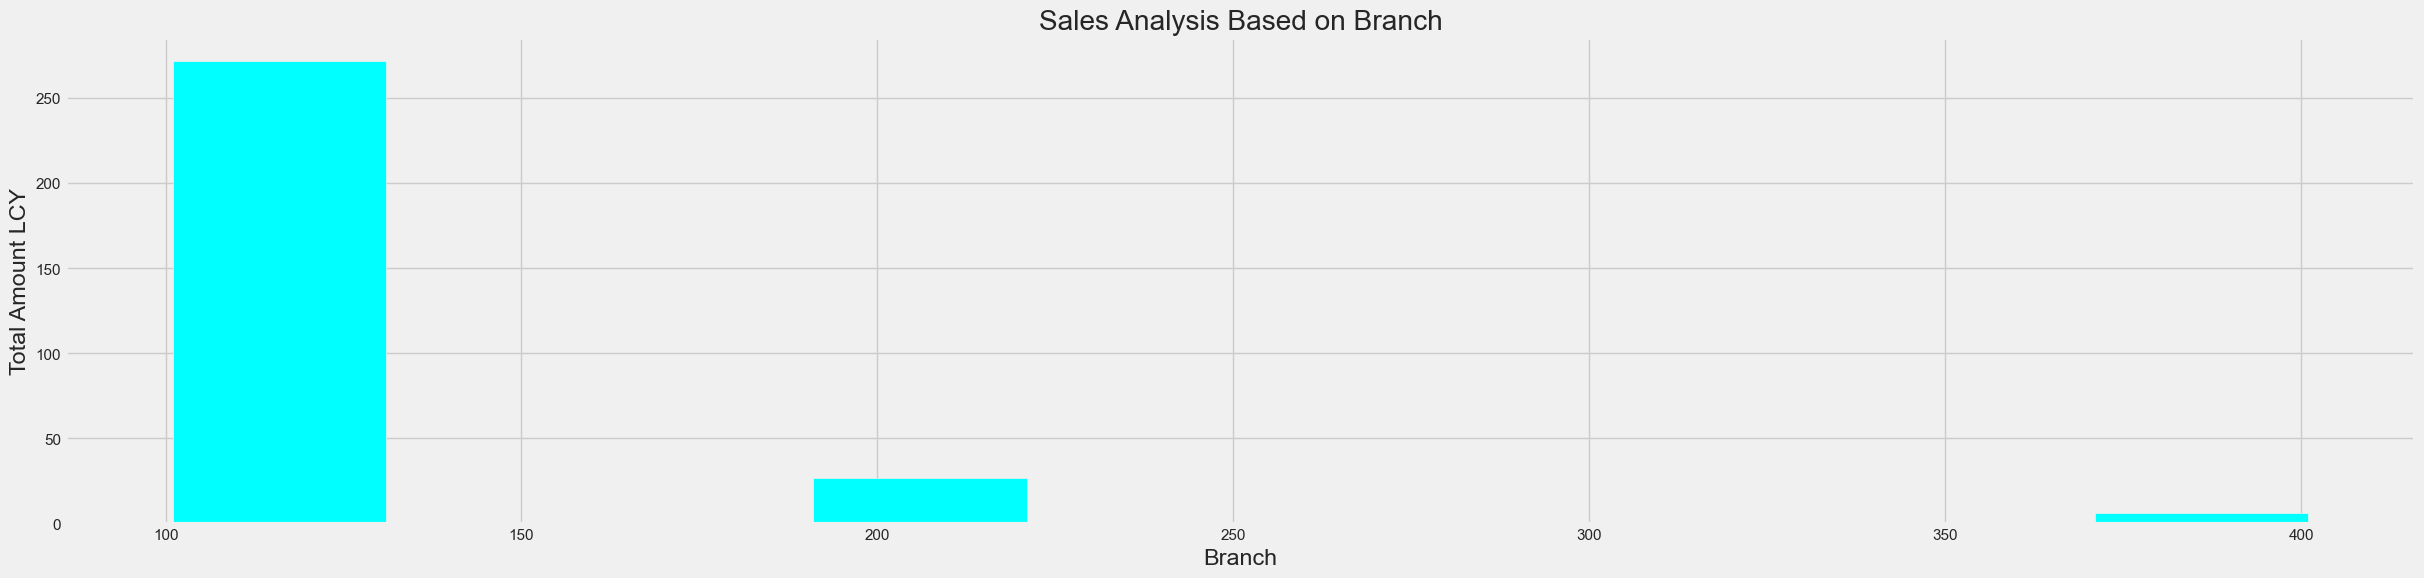

In [14]:
label=['Branch','Total Amount LCY'] 
fig = plt.figure() 
plt.style.use('fivethirtyeight') 
train.BranchCode.plot(kind='hist',color='cyan',figsize=(27,6)) 
plt.xticks(rotation=0) 
plt.xlabel("Branch") 
plt.ylabel("Total Amount LCY") 
plt.title("Sales Analysis Based on Branch") 
plt.show() 

C:\Users\Balasubramanian\AppData\Local\Temp\ipykernel_6828\3227017554.py:8: FutureWarning: The provided callable <function median at 0x000001A743F52340> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  Division_pivot= train.pivot_table(index='Division',values="Total Amount (LCY)",aggfunc=np.median)


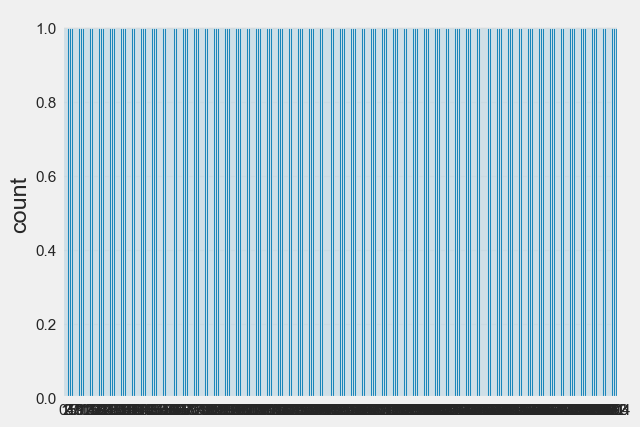

<Figure size 1200x900 with 0 Axes>

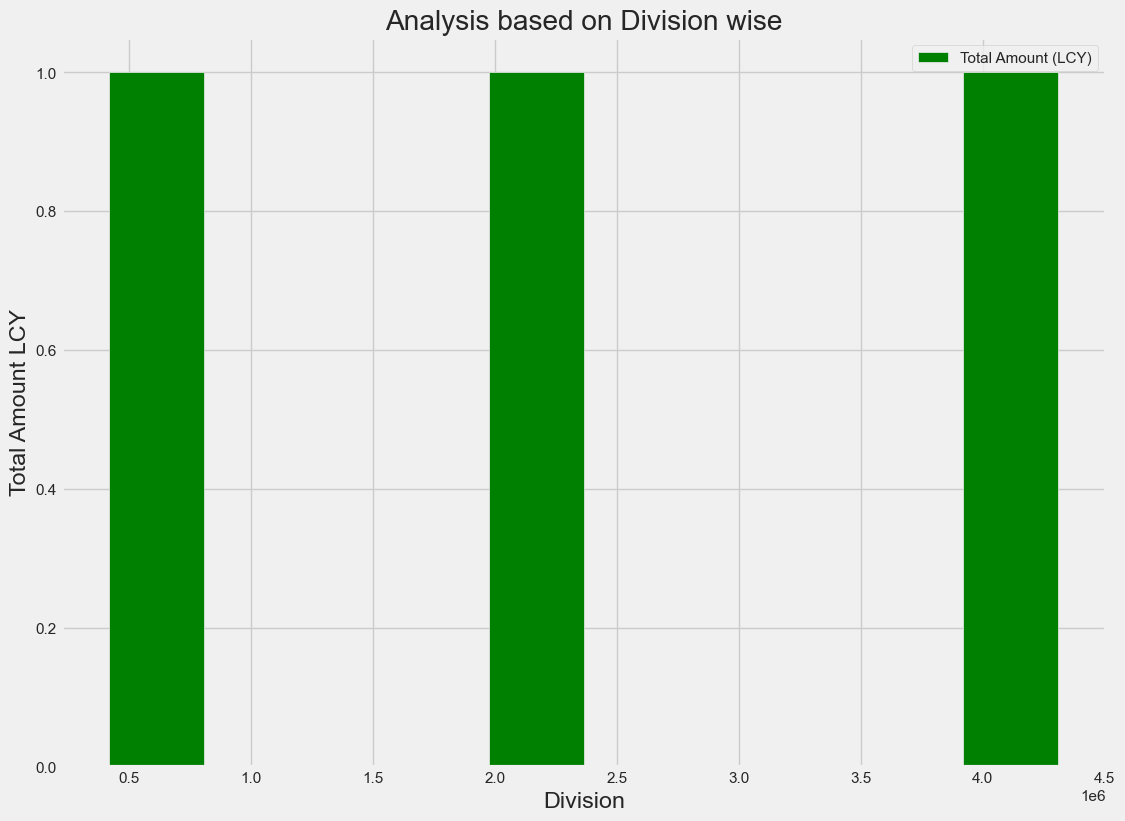

In [15]:
fig = plt.figure() 
ax = fig.add_subplot() 
plt.style.use('fivethirtyeight') 
label=['Division','Total Amount LCY']
label_Division=LabelEncoder() 
ax=sns.countplot(train.Division) 
plt.figure(figsize=(12,9)) 
Division_pivot= train.pivot_table(index='Division',values="Total Amount (LCY)",aggfunc=np.median) 
Division_pivot.plot(kind='hist',color='green',figsize=(12,9)) 
plt.xlabel("Division") 
plt.ylabel("Total Amount LCY") 
plt.title("Analysis based on Division wise") 
plt.xticks(rotation=0) 
plt.show()

In [16]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split  
from sklearn.datasets import load_iris 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
# Loading data  
irisData = load_iris()   
# Create feature and target arrays  
X = irisData.data  
y = irisData.target  
# Split into training and test set 
train=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\train.csv');
test=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\test.csv'); 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state=42) 
lr=LinearRegression()   
lr.fit(X_test,y_test) 
LinearRegression(copy_X=True,n_jobs=None) 
lr_accuracy=round(lr.score(X_test,y_test)*100,2) 
print(lr_accuracy) 
regressor=LinearRegression() 
regressor.fit(X_test,y_test) 
print(regressor.intercept_) 
print(regressor.coef_) 
print(regressor) 
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split  
from sklearn.datasets import load_iris 
# Loading data  
irisData = load_iris()  
# Create feature and target arrays  
X = irisData.data  
y = irisData.target  
# Split into training and test set 
train=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\train.csv');
test=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\test.csv');
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state=42) 
lr=LinearRegression()   
lr.fit(X_test,y_test) 
LinearRegression(copy_X=True,n_jobs=None) 
lr_accuracy=round(lr.score(X_test,y_test)*100,2) 
print(lr_accuracy)

95.84
-0.16523241334726846
[-0.11959722  0.09650818  0.14929642  0.82369752]
LinearRegression()
95.84


In [17]:
import numpy as np 
from sklearn import linear_model 
import sklearn.metrics as sm 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import log_loss 
import pandas as pd 
train=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\train.csv');
test=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\test.csv'); 
from sklearn.datasets import load_iris 
irisData =load_iris() 
X = irisData.data 
y = irisData.target 
columns=['Attribute'] 
X_train, X_test, y_train, y_test = train_test_split(  
X, y, test_size = 0.2, random_state=5) 
training_samples=int(0.6*len(X_train)) 
testing_samples=len(X_train)-1 
X_train,y_train=X[:training_samples],y[:training_samples] 
X_test,y_test=X[training_samples:],y[training_samples:] 
reg_linear=linear_model.LinearRegression() 
reg_linear.fit(X_train,y_train) 
y_test_pred=reg_linear.predict(X_test) 
print("Regressor model performance:") 
print("Mean Error=",round(sm.mean_absolute_error(y_test,y_test_pred),2)) 
print("Mean Error=",round(sm.mean_squared_error(y_test,y_test_pred),2)) 
print("Median Error=",round(sm.median_absolute_error(y_test,y_test_pred),2)) 
print("R2 score=",round(sm.r2_score(y_test,y_test_pred),2)) 
print('AUC-ROC:',round(sm.roc_auc_score(y_test,y_test_pred),2)) 
print('LOGLOSS:',round(sm.log_loss(y_test,y_test_pred),2)) 

Regressor model performance:
Mean Error= 0.43
Mean Error= 0.25
Median Error= 0.51
R2 score= -0.1
AUC-ROC: 0.99
LOGLOSS: 6.05


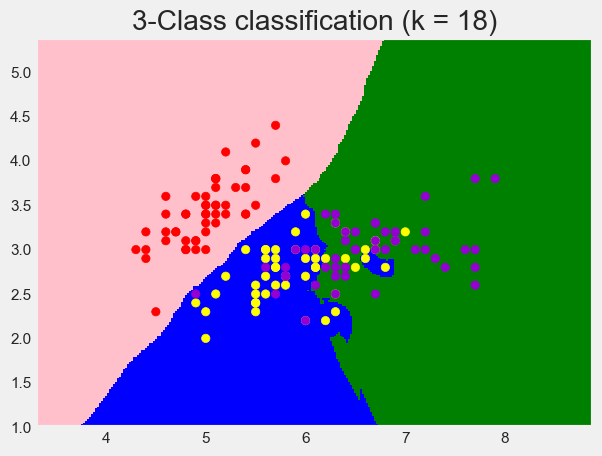

In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 
from sklearn import neighbors, datasets 
n_neighbors = 18 
train=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\train.csv');
test=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\test.csv'); 
# import some data to play with 
iris = datasets.load_iris() 
# prepare data 
X = iris.data[:, :2] 
y = iris.target 
h = .02 
# Create color maps 
cmap_light = ListedColormap(['pink', 'blue','green']) 
cmap_bold = ListedColormap(['red', 'yellow','darkviolet']) 
# we create an instance of Neighbours Classifier and fit the data. 
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance') 
clf.fit(X, y) 
# calculate min, max and limits 
132 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
np.arange(y_min, y_max, h)) 
# predict class using data and kNN classifier 
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
# Put the result into a color plot 
Z = Z.reshape(xx.shape) 
plt.style.use('fivethirtyeight') 
plt.figure() 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light) 
# Plot also the training points 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold) 
plt.xlim(xx.min(), xx.max()) 
plt.ylim(yy.min(), yy.max()) 
plt.title("3-Class classification (k = %i)" % (n_neighbors)) 
plt.show() 


In [19]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split  
from sklearn.datasets import load_iris 
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC 
train=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\train.csv');
test=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\test.csv');   
# Loading data  
irisData = load_iris()  
# Create feature and target arrays  
X = irisData.data  
y = irisData.target 
# Split into training and test set  
X_train, X_test, y_train, y_test = train_test_split(  
X, y, test_size = 0.2, random_state=42) 
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train) 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', 
metric_params=None, n_jobs=None, n_neighbors=5, p=2, 
weights='uniform') 
knn_prediction=knn.predict(X_test) 
print(accuracy_score(knn_prediction,y_test)) 
print(classification_report(knn_prediction,y_test)) 
print(confusion_matrix(knn_prediction,y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [20]:
import numpy as np 
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.svm import SVR 
import math 
import sklearn.metrics as sm 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import log_loss 
import pandas as pd 
train=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\train.csv');
test=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\test.csv');
from sklearn.datasets import load_iris 
irisData =load_iris() 
X = irisData.data 
y = irisData.target 
columns=['Attribute'] 
X_train, X_test, y_train, y_test = train_test_split(  
X, y, test_size = 0.3, random_state=100) 
training_samples=int(0.6*len(X_train)) 
testing_samples=len(X_train)-1 
X_train,y_train=X[:training_samples],y[:training_samples] 
X_test,y_test=X[training_samples:],y[training_samples:] 
regressor_multi=LinearRegression() 
regressor_multi.fit(X_train,y_train) 
y_pred=regressor_multi.predict(X_test) 
accuracy=cross_val_score(estimator=regressor_multi,X=X_train,y=y_train,cv=10) 
print(f"The accuracy of MultiLinear Regression model is \t {accuracy.mean()}") 
print(f"The deviation in accuracy is \t {accuracy.std()}") 
mse=mean_squared_error(y_test,y_pred) 
print("mean squared error is:",mse) 
print("root mean squared error is:",math.sqrt(mse)) 
regressor_random=RandomForestRegressor(n_estimators=100) 
regressor_random.fit(X_train,y_train) 
accuracy=cross_val_score(estimator=regressor_random,X=X_train,y=y_train,cv=10) 
print(f"The accuracy of RandomForest Regression model is \t {accuracy.mean()}") 
print(f"The deviation in accuracy is \t {accuracy.std()}") 
y_pred=regressor_random.predict(X_test) 
mse=mean_squared_error(y_test,y_pred) 
print("mean squared error is:",mse) 
print("root mean squared error is:",math.sqrt(mse)) 
poly_reg=PolynomialFeatures(degree=4) 
x_poly=poly_reg.fit_transform(X_train) 
regressor_poly=LinearRegression() 
regressor_poly.fit(x_poly,y_train) 
from sklearn.metrics import accuracy_score 
accuracy=cross_val_score(estimator=regressor_poly,X=X_train,y=y_train,cv=10) 
print(f"The accuracy of Polynomial  Regression model is \t {accuracy.mean()}") 
print(f"The deviation in accuracy is \t {accuracy.std()}") 
mse=mean_squared_error(y_test,y_pred) 
print("mean squared error is:",mse) 
print("root mean squared error is:",math.sqrt(mse)) 
model=SVR() 
model.fit(X_train,y_train) 
y_pred=model.predict(X_test) 
accuracy=cross_val_score(estimator=regressor_poly,X=X_train,y=y_train,cv=10) 
print(f"The accuracy of SVR Regression model is \t {accuracy.mean()}") 
print(f"The deviation in accuracy is \t {accuracy.std()}") 
mse=mean_squared_error(y_test,y_pred) 
print("mean squared error is:",mse) 
print("root mean squared error is:",math.sqrt(mse))

The accuracy of MultiLinear Regression model is 	 0.09935836177987666
The deviation in accuracy is 	 0.29807508533962995
mean squared error is: 0.21889350487104714
root mean squared error is: 0.4678605613546061
The accuracy of RandomForest Regression model is 	 0.8
The deviation in accuracy is 	 0.4
mean squared error is: 0.5747126436781609
root mean squared error is: 0.7580980435789034
The accuracy of Polynomial  Regression model is 	 0.09935836177987666
The deviation in accuracy is 	 0.29807508533962995
mean squared error is: 0.5747126436781609
root mean squared error is: 0.7580980435789034
The accuracy of SVR Regression model is 	 0.09935836177987666
The deviation in accuracy is 	 0.29807508533962995
mean squared error is: 0.6465446038761712
root mean squared error is: 0.8040799735574635


[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2 1 1 1 0 0 1 0
 1 2 2 0 1 2 2 0]
|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2

[Text(0.4, 0.9, 'x[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [34, 39, 32]'), Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'), Text(0.35, 0.8, 'True  '), Text(0.5, 0.7, 'x[3] <= 1.65\ngini = 0.495\nsamples = 71\nvalue = [0, 39, 32]'), Text(0.45, 0.8, '  False'), Text(0.2, 0.5, 'x[2] <= 5.0\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'), Text(0.1, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'), Text(0.3, 0.3, 'x[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3

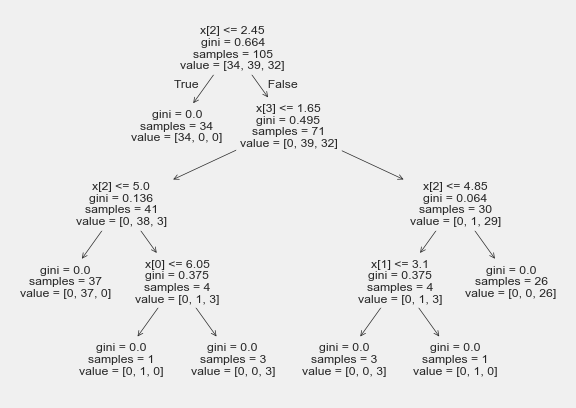

In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
train=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\train.csv');
test=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\test.csv'); 
from sklearn import tree  
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
irisData =load_iris() 
X = irisData.data 
y = irisData.target 
columns=['Attribute'] 
X_train, X_test, y_train, y_test = train_test_split(  
X, y, test_size = 0.3, random_state=100) 
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5) 
clf_entropy.fit(X_train, y_train) 
y_pred_en=clf_entropy.predict(X_test) 
print(y_pred_en) 
from sklearn.datasets import load_iris  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_text  
from sklearn.model_selection import train_test_split  
iris = load_iris()  
X = irisData.data 
y = irisData.target 
columns=['Attribute'] 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state=100) 
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X_train, y_train)  
feature_cols=['weight','itemMRP','outletsales'] 
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3) 
decision_tree = decision_tree.fit(iris.data, iris.target) 
r = export_text(decision_tree, feature_names=iris['feature_names']) 
print(r) 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
train=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\train.csv');
test=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\test.csv'); 
from sklearn import tree  
from sklearn.datasets import load_iris 
139 
from sklearn.model_selection import train_test_split  
irisData=load_iris() 
X = irisData.data 
y = irisData.target 
columns=['Attribute'] 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state=100) 
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X_train, y_train)  
print(tree.plot_tree(clf)) 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
train=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\train.csv');
test=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\test.csv'); 
from sklearn import tree  
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split  
import graphviz  
irisData=load_iris() 
X = irisData.data 
y = irisData.target 
columns=['Attribute'] 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state=100) 
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X_train, y_train)  
dot_data = tree.export_graphviz(clf,out_file=None)  
graph = graphviz.Source(dot_data)  
dot_data=tree.export_graphviz(clf,out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True, rounded=True,special_characters=True)   
graph = graphviz.Source(dot_data)   
print(graph) 
plt.show()

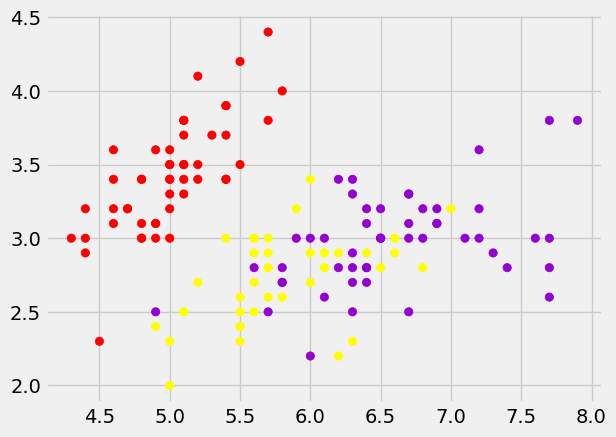

In [3]:
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc 
from matplotlib import pyplot as plt 
Cluster=AgglomerativeClustering(n_clusters=4,linkage='ward') 
import pandas as pd 
from sklearn.model_selection import train_test_split 
train=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\train.csv');
test=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\test.csv');  
from sklearn.datasets import load_iris 
irisData = load_iris() 
# Create feature and target arrays 
X = irisData.data 
y = irisData.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
Cluster=AgglomerativeClustering(n_clusters=4,linkage='ward') 
train=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\train.csv');
test=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\test.csv'); 
train=train.iloc[:,3:5].values 
Cluster.fit(X_train,y_train) 
from matplotlib.colors import ListedColormap 
from sklearn import datasets 
from pylab import * 
from sklearn.datasets import load_iris 
cmap_bold = ListedColormap(['red', 'yellow','darkviolet']) 
plt.style.use('fivethirtyeight') 
plt.figure() 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold) 
plt.show()

DecisionTreeClassifier()
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 2 0 1 2]


C:\Users\Balasubramanian\AppData\Local\Temp\ipykernel_2452\3262403774.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test[:, 0], X_test[:, 1], cmap=cmap_bold)
C:\Users\Balasubramanian\AppData\Local\Temp\ipykernel_2452\3262403774.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[:, 0], X_train[:, 1], cmap=cmap_bold)


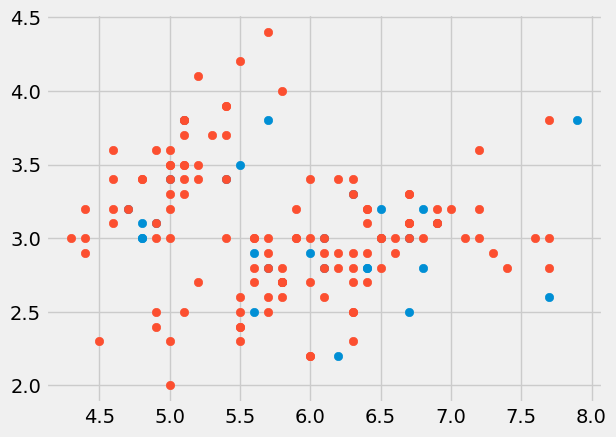

In [5]:
import pandas as pd 
from sklearn import tree 
from sklearn.model_selection import train_test_split 
142 
from sklearn.datasets import load_iris 
# Loading data 
irisData = load_iris() 
# Create feature and target arrays 
X = irisData.data 
y = irisData.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=42) 
train=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\train.csv');
test=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\test.csv');
classifier = tree.DecisionTreeClassifier() 
classifier.fit(X_train,y_train) 
classifier.predict(X_test) 
print(classifier) 
print(classifier.predict(X_test)) 
print(classifier.predict(X_train)) 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 
from sklearn import datasets 
from pylab import * 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans 
# Loading data 
irisData = load_iris() 
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans 
k_means.fit(X) 
y_pred = k_means.predict(X) 
# Create feature and target arrays 
X = irisData.data 
y = irisData.target 
cmap_bold = ListedColormap(['red', 'yellow','darkviolet']) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
train=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\train.csv');
test=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\test.csv');
k_means.fit(X_train) 
plt.style.use('fivethirtyeight') 
train=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\train.csv');
test=pd.read_csv(r'C:\Users\Balasubramanian\OneDrive\Balaji\Python Projects\test.csv'); 
plt.scatter(X_test[:, 0], X_test[:, 1], cmap=cmap_bold) 
plt.scatter(X_train[:, 0], X_train[:, 1], cmap=cmap_bold) 
plt.show()